# Welcome to a qMRLab interactive blog post Jupyter Notebook!

If this is your first time running a Juptyer Notebook, there's a lot of tutorials available online to help. [Here's one](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) for your convenience.

## Introduction

This notebook contains everything needed to reproduce the Variable Flip Angle T<sub>1</sub> blog post on the [qMRLab website](). In fact, this notebook generated the HTML for the blog post too! This notebook is currently running on a MyBinder server that only you can access, but if you want to be kept up-to-date on any changes that the developpers make to this notebook, you should go to it's [GitHub repository](https://github.com/qMRLab/t1_notebooks) and follow it by clicking the "Watch" button in the top right (you may need to create a GitHub account, if you don't have one already).

## Tips

Here's a few things you can do in this notebook

### Code
* Run the entire processing by clicking above on the "Kernel" tab, then "Restart & Run All". It will be complete when none of the cells have an asterix "\*" in the square brackets.
* To change the code, you need to click once on code cells. To re-run that cell, click the "Run" button above when the cell is selected.
  * **Note:** Cells can depend on previous cells, or even on previous runs of the cell itself, so it's best to run all the previous cells beforehand.
* This binder runs on SoS, which allows the mixing of Octave (i.e. an open-source MATLAB) and Python cells. Take a look a the drop down menu on the top right of the cells to know which one you are running.
* To transfer data from cells of one language to another, you need to create a new cell in the incoming language and run `%get (param name) --from (outgoing language)`. See cells below for several examples within this notebook.

### HTML
* To reproduce the HTML of the blog post, run the entire processing pipeline (see point one in the previous section), then save the notebook (save icon, top left). Now, click on the drop down menu on the left pannel, and select `%sossave --to html --force` . After a few seconds, it should output "Workflow saved to VariableFlipAngle.html" – click on the HTML name, and you're done!
* Cells with tags called "scratch" are not displayed in the generated HTML.
* Cells with the tag "report_output" display the output (e.g. figures) in the generated HTML.
* Currently in an un-run notebook, the HTML is not formatted like the website. To do so, run the Python module import cell (`# Module imports`) and then very last cell (`display(HTML(...)`).

**If you have any other questions or comments, please raise them in a [GitHub issue](https://github.com/qMRLab/t1_notebooks/issues).**

# Note

The following cell is meant to be displayed for instructional purposes in the blog post HTML when "All cells" gets displayed (i.e. the Octave code).

In [1]:
% **Blog post code introduction**
% 
% Congrats on activating the "All cells" option in this interactive blog post =D
%
% Below, several new HTML blocks have appears prior to the figures, displaying the Octave/MATLAB code that was used to generate the figures in this blog post.
%
% If you want to reproduce the data on your own local computer, you simply need to have qMRLab installed in your Octave/MATLAB path and run the "startup.m" file, as is shown below.
%
% If you want to get under the hood and modify the code right now, you can do so in the Jupyter Notebook of this blog post hosted on MyBinder. The link to it is in the introduction above.

In [2]:
# PYTHON CODE
# Module imports

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
config={'showLink': False, 'displayModeBar': False}

init_notebook_mode(connected=True)

from IPython.core.display import display, HTML

<center><h1 style="font-family: timesnewroman;font-size: 40px;">Variable Flip Angle T<sub>1</sub> Mapping</h1></center>
<p>

<div class=blog_body>
<p style="text-align:justify;">
Variable flip angle (VFA) T<sub>1</sub> mapping (Christensen et al. 1974; Gupta 1977; Fram et al. 1987), also known as Driven Equilibrium Single Pulse Observation of T<sub>1</sub> (DESPOT1) (Homer & Beevers 1985; Deoni et al. 2003), is a rapid quantitative T<sub>1</sub> measurement technique that is widely used to acquire 3D T<sub>1</sub> maps (e.g. whole-brain) in a clinically feasible time. VFA estimates T<sub>1</sub> values by acquiring multiple spoiled gradient echo acquisitions, each with different excitation flip angles (<i>θ<sub>n</sub></i> for n = 1, 2, .., N and <i>θ<sub>i</sub></i> ≠ <i>θ<sub>j</sub></i>). The steady-state signal of this pulse sequence (Figure 1) uses very short TRs (on the order of magnitude of 10 ms) and is very sensitive to T<sub>1</sub> for a wide range of flip angles.
</p>

<p style="text-align:justify;">
VFA is a technique that originates from the NMR field, and was adopted because of its time efficiency and the ability to acquire accurate T<sub>1</sub> values simultaneously for a wide range of values (Christensen et al. 1974; Gupta 1977). For imaging applications, VFA also benefits from an increase in SNR because it can be acquired using a 3D acquisition instead of multislice, which also helps to reduce slice profile effects. One important drawback of VFA for T<sub>1</sub> mapping is that the signal is very sensitive to inaccuracies in the flip angle value, thus impacting the T<sub>1</sub> estimates.  In practice, the nominal flip angle (i.e. the value set at the scanner) is different than the actual flip angle experienced by the spins (e.g. at 3.0 T, variations of up to ±30%), an issue that increases with field strength. VFA typically requires the acquisition of another quantitative map, the transmit RF amplitude (B<sub>1</sub><sup>+</sup>, or B<sub>1</sub> for short), to calibrate the nominal flip angle to its actual value because of B<sub>1</sub> inhomogeneities that occur in most loaded MRI coils (Sled & Pike 1998). The need to acquire an additional B<sub>1</sub> map reduces the time savings offered by VFA over saturation-recovery techniques, and inaccuracies/imprecisions of the B<sub>1</sub> map are also propagated into the VFA T<sub>1</sub> map (Boudreau et al. 2017; Lee et al. 2017).
</p>
</div>

<div class=figure_caption>
<p style="text-align:justify;">
<b>
Figure 1. Simplified pulse sequence diagram of a variable flip angle (VFA) pulse sequence with a gradient echo readout. TR: repetition time, <i>θ<sub>n</sub></i>: excitation flip angle for the nth measurement, IMG: image acquisition (k-space readout), SPOIL: spoiler gradient.
</b>
</p>
</div>

<p>
<center><img src="vfa_pulsesequence.png" style="width:500px;height:auto;"></center>

<center> <h2 style="font-family:timesnewroman;font-size:30px">Signal Modelling</h2> </center>

<div class=blog_body>
<p style="text-align:justify;">
The steady-state longitudinal magnetization of an ideal variable flip angle experiment can be analytically solved from the Bloch equations for the spoiled gradient echo pulse sequence {<i>θ<sub>n</sub></i>–TR}:
</p>

<p style="text-align:justify;">
<center><img src="equation1.png" style="width:auto;height:50px;margin-bottom: 50px;margin-top: 50px;"></center>
</p>

<p style="text-align:justify;">
where <i>M<sub>z</sub></i> is the longitudinal magnetization, <i>M</i><sub>0</sub> is the magnetization at thermal equilibrium, TR is the pulse sequence repetition time (Figure 1), and <i>θ<sub>n</sub></i> is the excitation flip angle. The <i>M<sub>z</sub></i> curves of different T<sub>1</sub> values for a range of <i>θ<sub>n</sub></i> and TR values are shown in Figure 2.
</p>

</div>

<div class=figure_caption>
<p style="text-align:justify;">
<b>
Figure 2. Variable flip angle technique signal curves (Eq. 1) for three different T<sub>1</sub> values, approximating the main types of tissue in the brain at 3T.
</b>
</p>
</div>

In [3]:
%% MATLAB/OCTAVE CODE
% Adds qMRLab to the path of the environment

cd ../qMRLab
startup

    startup at line 1 column 1
    startup at line 1 column 1
loading struct
loading io
loading statistics
loading optim
loading image


In [4]:
%% MATLAB/OCTAVE CODE
% Code used to generate the data required for Figure 4 of the blog post

clear all

%% Setup parameters
% All times are in milliseconds
% All flip angles are in degrees

TR_range = 5:5:200;

params.EXC_FA = 1:90;

%% Calculate signals
%
% To see all the options available, run `help vfa_t1.analytical_solution`

for ii = 1:length(TR_range)
    params.TR = TR_range(ii);
    
    % White matter
    params.T1 = 900; % in milliseconds

    signal_WM(ii,:) = vfa_t1.analytical_solution(params);

    % Grey matter
    params.T1 = 1500;  % in milliseconds
    signal_GM(ii,:) = vfa_t1.analytical_solution(params);

    % CSF
    params.T1 = 4000;  % in milliseconds
    signal_CSF(ii,:) = vfa_t1.analytical_solution(params);
end


In [5]:
%get params --from Octave
%get TR_range --from Octave
%get signal_WM --from Octave
%get signal_GM --from Octave
%get signal_CSF --from Octave

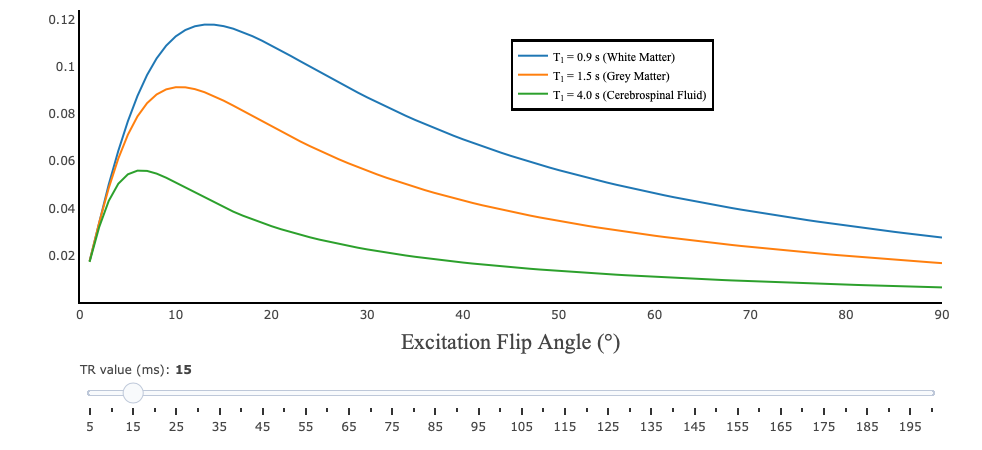

In [6]:
# PYTHON CODE

init_notebook_mode(connected=True)

data1 = [dict(
        visible = False,
        mode = 'lines',
        x = params["EXC_FA"],
        y = abs(np.squeeze(np.asarray(signal_WM[ii]))),
        name = 'T<sub>1</sub> = 0.9 s (White Matter)',
        text = 'T<sub>1</sub> = 0.9 s (White Matter)',
        hoverinfo = 'x+y+text') for ii in range(len(TR_range))]

data1[4]['visible'] = True

data2 = [dict(
        visible = False,
        mode = 'lines',
        x = params["EXC_FA"],
        y = abs(np.squeeze(np.asarray(signal_GM[ii]))),
        name = 'T<sub>1</sub> = 1.5 s (Grey Matter)',
        text = 'T<sub>1</sub> = 1.5 s (Grey Matter)',
        hoverinfo = 'x+y+text') for ii in range(len(TR_range))]

data2[4]['visible'] = True

data3 = [dict(
        visible = False,
        mode = 'lines',
        x = params["EXC_FA"],
        y = abs(np.squeeze(np.asarray(signal_CSF[ii]))),
        name = 'T<sub>1</sub> = 4.0 s (Cerebrospinal Fluid)',
        text = 'T<sub>1</sub> = 4.0 s (Cerebrospinal Fluid)',
        hoverinfo = 'x+y+text') for ii in range(len(TR_range))]

data3[4]['visible'] = True

data = data1 + data2 + data3

steps = []
for i in range(len(TR_range)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data1)],
        label = str(TR_range[i])
        )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    x = 0,
    y = -0.02,
    active = 2,
    currentvalue = {"prefix": "TR value (ms): <b>"},
    pad = {"t": 50, "b": 10},
    steps = steps
)]

layout = go.Layout(
    width=580,
    height=450,
    margin=go.layout.Margin(
        l=80,
        r=40,
        b=60,
        t=10,
    ),
    annotations=[
        dict(
            x=0.5004254919715793,
            y=-0.18,
            showarrow=False,
            text='Excitation Flip Angle (°)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.15,
            y=0.5,
            showarrow=False,
            text='Long. Magnetization (M<sub>z</sub>)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        ),
    ],
    xaxis=dict(
        autorange=False,
        range=[0, params['EXC_FA'][-1]],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    legend=dict(
        x=0.5,
        y=0.9,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    ), 
    sliders=sliders
)

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-line', config = config)

<div class=blog_body>

<p style="text-align:justify;">
From Figure 2, it is clearly seen that the flip angle at which the steady-state signal is maximized is dependent on the T<sub>1</sub> and TR values. This flip angle is a well known quantity, called the Ernst angle (Ernst & Anderson 1966), which can be solved analytically from Equation 1 using properties of calculus:
</p>


<p style="text-align:justify;">
<center><img src="equation2.png" style="width:auto;height:50px;margin-bottom: 50px;margin-top: 50px"></center>
</p>

<p style="text-align:justify;">
The closed-form solution (Equation 1) makes several assumptions which in practice may not always hold true if care is not taken. Mainly, it is assumed that the longitudinal magnetization has reached a steady state after a large number of TRs, and that the transverse magnetization is perfectly spoiled at the end of each TR. Bloch simulations – a numerical approach at solving the Bloch <i>equations</i> for a set of spins at each time point –  provide a more realistic estimate of the signal if the number of repetition times is small (i.e. a steady-state is not achieved). As can be seen from Figure 3, the number of repetitions required to reach a steady state not only depends on T<sub>1</sub>, but also on the flip angle; flip angles near the Ernst angle need more TRs to reach a steady state. Preparation pulses or an outward-in k-space acquisition pattern are typically sufficient to reach a steady state by the time that the center of k-space is acquired, which is where most of the image contrast resides.
</p>
</div>

<div class=figure_caption>
<p style="text-align:justify;">
<b>
Figure 3. Signal curves simulated using Bloch simulations (orange) for a number of repetitions ranging from 1 to 150, plotted against the ideal case (Equation 1 – blue). Simulation details:  TR = 25 ms, T<sub>1</sub> = 900 ms, 100 spins. Ideal spoiling was used for this set of Bloch simulations (transverse magnetization was set to 0 at the end of each TR).
</b>
</p>
</div>

In [7]:
%% MATLAB/OCTAVE CODE
% Code used to generate the data required for Figure 4 of the blog post

clear all

%% Setup parameters
% All times are in milliseconds
% All flip angles are in degrees

% White matter
params.T1 = 900; % in milliseconds
params.T2 = 10000;
params.TR = 25;
params.TE = 5;
params.EXC_FA = 1:90;
Nex_range = 1:1:150;

%% Calculate signals
%
% To see all the options available, run `help vfa_t1.analytical_solution`

for ii = 1:length(Nex_range)
    params.Nex = Nex_range(ii);
    
    signal_analytical(ii,:) = vfa_t1.analytical_solution(params);

    [~, complex_signal] = vfa_t1.bloch_sim(params);
    signal_blochsim(ii,:) = abs(complex(complex_signal));
end


In [8]:
%get params --from Octave
%get Nex_range --from Octave
%get signal_analytical --from Octave
%get signal_blochsim --from Octave

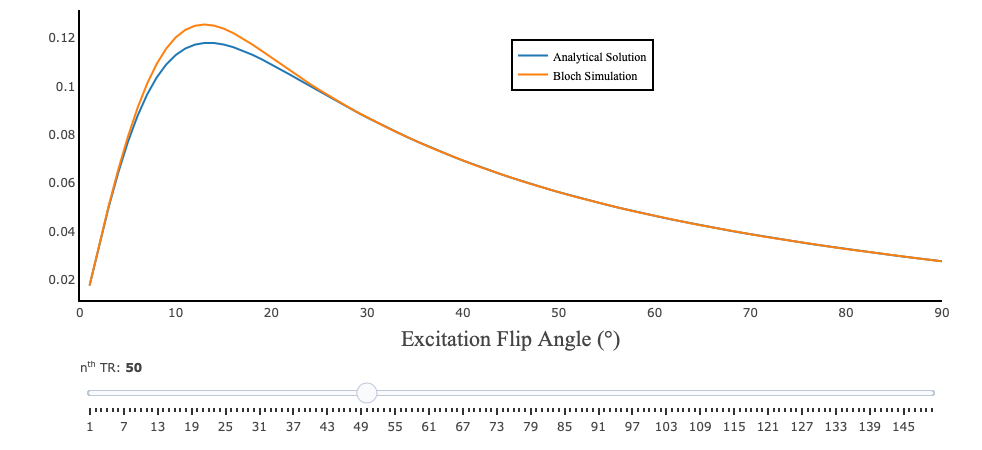

In [9]:
# PYTHON CODE

init_notebook_mode(connected=True)

data1 = [dict(
        visible = False,
        mode = 'lines',
        x = params["EXC_FA"],
        y = abs(np.squeeze(np.asarray(signal_analytical[ii]))),
        name = 'Analytical Solution',
        text = 'Analytical Solution',
        hoverinfo = 'x+y+text') for ii in range(len(Nex_range))]

data1[49]['visible'] = True

data2 = [dict(
        visible = False,
        mode = 'lines',
        x = params["EXC_FA"],
        y = abs(np.squeeze(np.asarray(signal_blochsim[ii]))),
        name = 'Bloch Simulation',
        text = 'Bloch Simulation',
        hoverinfo = 'x+y+text') for ii in range(len(Nex_range))]

data2[49]['visible'] = True

data = data1 + data2

steps = []
for i in range(len(Nex_range)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data1)],
        label = str(Nex_range[i])
        )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    x = 0,
    y = -0.02,
    active = 49,
    currentvalue = {"prefix": "n<sup>th</sup> TR: <b>"},
    pad = {"t": 50, "b": 10},
    steps = steps
)]

layout = go.Layout(
    width=580,
    height=450,
    margin=go.layout.Margin(
        l=80,
        r=40,
        b=60,
        t=10,
    ),
    annotations=[
        dict(
            x=0.5004254919715793,
            y=-0.18,
            showarrow=False,
            text='Excitation Flip Angle (°)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.15,
            y=0.5,
            showarrow=False,
            text='Signal',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        ),
    ],
    xaxis=dict(
        autorange=False,
        range=[0, params['EXC_FA'][-1]],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    legend=dict(
        x=0.5,
        y=0.9,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    ), 
    sliders=sliders
)

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-line', config = config)

<div class=blog_body>
<p style="text-align:justify;">
Sufficient spoiling is likely the most challenging parameter to control for in a VFA experiment. A combination of both gradient spoiling and RF phase spoiling (Zur et al. 1991; Bernstein et al. 2004) are typically recommended (Figure 4). It has also been shown that the use of very strong  gradients, introduces diffusion effects (not considered in Figure 4), further improving the spoiling efficacy in the VFA pulse sequence (Yarnykh 2010).
</p>
</div>

<div class=figure_caption>
<p style="text-align:justify;">
<b>
Figure 4. Signal curves estimated using Bloch simulations for three categories of signal spoiling: (1) ideal spoiling (blue), gradient & RF Spoiling (orange), and no spoiling (green). Simulations details: TR = 25 ms, T<sub>1</sub> = 900 ms, T<sub>e</sub> = 100 ms, TE = 5 ms, 100 spins. For the ideal spoiling case, the transverse magnetization is set to zero at the end of each TR. For the gradient & RF spoiling case, each spin is rotated by different increments of phase (2𝜋 / # of spins) to simulate complete decoherence from gradient spoiling, and the RF phase of the excitation pulse is  ɸ<sub><i>n</i></sub> = ɸ<sub><i>n</i>-1</sub> + <i>n</i>ɸ<sub>0</sub> = ½ ɸ<sub>0</sub>(<i>n</i><sup>2</sup> + <i>n</i> + 2) (Bernstein et al. 2004) with ɸ<sub>0</sub> = 117° (Zur et al. 1991) after each TR.
</b>
</p>
</div>

In [10]:
%% MATLAB/OCTAVE CODE
% Code used to generate the data required for Figure 4 of the blog post

clear all

%% Setup parameters
% All times are in milliseconds
% All flip angles are in degrees

% White matter
params.T1 = 900; % in milliseconds
params.T2 = 100;
params.TR = 25;
params.TE = 5;
params.EXC_FA = 1:90;
Nex_range = [1:9, 10:10:100];

%% Calculate signals
%
% To see all the options available, run `help vfa_t1.analytical_solution`

for ii = 1:length(Nex_range)
    params.Nex = Nex_range(ii);
    
    params.crushFlag = 1;
    
    [~, complex_signal] = vfa_t1.bloch_sim(params);
    signal_ideal_spoil(ii,:) = abs(complex_signal);
    
    
    params.inc = 117;
    params.partialDephasing = 1;
    params.partialDephasingFlag = 1;
    params.crushFlag = 0;
    
    [~, complex_signal] = vfa_t1.bloch_sim(params);
    signal_optimal_crush_and_rf_spoil(ii,:) = abs(complex_signal);
    
    params.inc = 0;
    params.partialDephasing = 0;

    [~, complex_signal] = vfa_t1.bloch_sim(params);
    signal_no_gradient_and_rf_spoil(ii,:) = abs(complex_signal);
end


In [11]:
%get params --from Octave
%get Nex_range --from Octave
%get signal_ideal_spoil --from Octave
%get signal_optimal_crush_and_rf_spoil --from Octave
%get signal_no_gradient_and_rf_spoil --from Octave

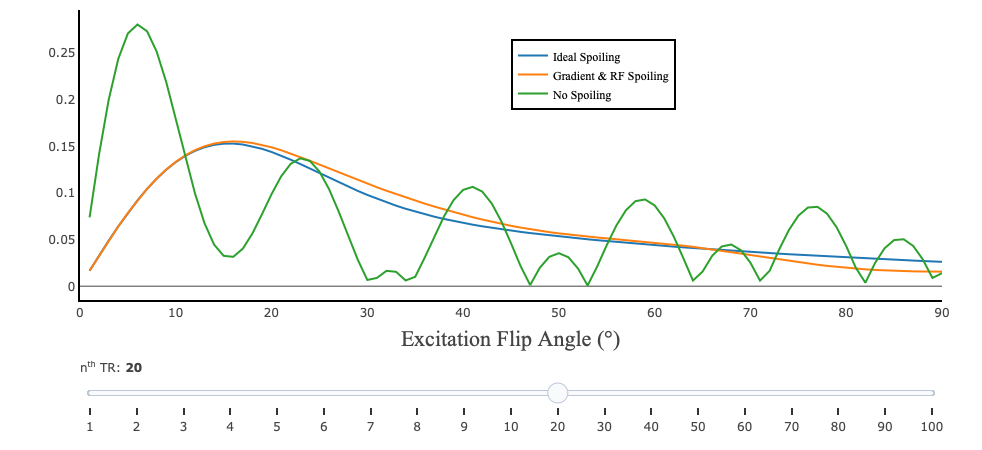

In [12]:
# PYTHON CODE

init_notebook_mode(connected=True)

data1 = [dict(
        visible = False,
        mode = 'lines',
        x = params["EXC_FA"],
        y = abs(np.squeeze(np.asarray(signal_ideal_spoil[ii]))),
        name = 'Ideal Spoiling',
        text = 'Ideal Spoiling',
        hoverinfo = 'x+y+text') for ii in range(len(Nex_range))]

data1[10]['visible'] = True

data2 = [dict(
        visible = False,
        mode = 'lines',
        x = params["EXC_FA"],
        y = abs(np.squeeze(np.asarray(signal_optimal_crush_and_rf_spoil[ii]))),
        name = 'Gradient & RF Spoiling',
        text = 'Gradient & RF Spoiling',
        hoverinfo = 'x+y+text') for ii in range(len(Nex_range))]

data2[10]['visible'] = True

data3 = [dict(
        visible = False,
        mode = 'lines',
        x = params["EXC_FA"],
        y = abs(np.squeeze(np.asarray(signal_no_gradient_and_rf_spoil[ii]))),
        name = 'No Spoiling',
        text = 'No Spoiling',
        hoverinfo = 'x+y+text') for ii in range(len(Nex_range))]

data3[10]['visible'] = True

data = data1 + data2+ data3

steps = []
for i in range(len(Nex_range)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data1)],
        label = str(Nex_range[i])
        )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    x = 0,
    y = -0.02,
    active = 10,
    currentvalue = {"prefix": "n<sup>th</sup> TR: <b>"},
    pad = {"t": 50, "b": 10},
    steps = steps
)]

layout = go.Layout(
    width=580,
    height=450,
    margin=go.layout.Margin(
        l=80,
        r=40,
        b=60,
        t=10,
    ),
    annotations=[
        dict(
            x=0.5004254919715793,
            y=-0.18,
            showarrow=False,
            text='Excitation Flip Angle (°)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.15,
            y=0.5,
            showarrow=False,
            text='Signal',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        ),
    ],
    xaxis=dict(
        autorange=False,
        range=[0, params['EXC_FA'][-1]],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    legend=dict(
        x=0.5,
        y=0.9,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    ), 
    sliders=sliders
)

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-line', config = config)

<center> <h2 style="font-family:timesnewroman;font-size:30px">Data Fitting</h2> </center>

<div class=blog_body>
<p style="text-align:justify;">
At first glance, one could be tempted to fit VFA data using a non-linear least squares fitting algorithm such as Levenberg-Marquardt with Eq. 1, which typically only has two free fitting variables (T<sub>1</sub> and <i>M</i><sub>0</sub>). Although this is a valid way of estimating T<sub>1</sub> from VFA data, it is rarely done in practice because a simple refactoring of Equation 1 allows T<sub>1</sub> values to be estimated with a linear least square fitting algorithm, which substantially reduces the processing time. Without any approximations, Equation 1 can be rearranged into the form <b>y</b> = m<b>x</b>+b (Gupta 1977):
</p>

<p style="text-align:justify;">
<center><img src="equation3.png" style="width:auto;height:50px;margin-bottom: 50px;margin-top: 50px"></center>
</p>

<p style="text-align:justify;">
As the third term does not change between measurements (it is constant for each <i>θ<sub>n</sub></i>), it can be grouped into the constant for a simpler representation:
</p>

<p style="text-align:justify;">
<center><img src="equation4.png" style="width:auto;height:50px;margin-bottom: 50px;margin-top: 50px"></center>
</p>

<p style="text-align:justify;">
With this rearranged form of Equation 1, T<sub>1</sub> can be simply estimated from the slope of a linear regression calculated from <i>S<sub>n</sub></i>/sin(<i>θ<sub>n</sub></i>) and <i>S<sub>n</sub></i>/tan(<i>θ<sub>n</sub></i>) values:
</p>

<p style="text-align:justify;">
<center><img src="equation5.png" style="width:auto;height:50px;margin-bottom: 50px;margin-top: 50px"></center>
</p>

<p style="text-align:justify;">
If data were acquired using only two flip angles – a very common VFA acquisition protocol – then the slope can be calculated using the elementary slope equation. Figure 5 displays both Equation 1 and 4 plotted for a noisy dataset.
</p>

</div>

<div class=figure_caption>
<p style="text-align:justify;">
<b>
Figure 5. Mean and standard deviation of the VFA signal plotted using the nonlinear form (Equation 1 – blue) and linear form (Equation 4 – red). Monte Carlo simulation details: SNR = 25, N = 1000. VFA simulation details: TR = 25 ms, T<sub>1</sub> = 900 ms.
</b>
</div>

In [13]:
%% MATLAB/OCTAVE CODE
% Code used to generate the data required for Figure 4 of the blog post

clear all

%% Setup parameters
% All times are in milliseconds
% All flip angles are in degrees

params.EXC_FA = [1:4,5:5:90];

%% Calculate signals
%
% To see all the options available, run `help vfa_t1.analytical_solution`

params.TR = 0.025;
params.EXC_FA = [2:9,10:5:90];

% White matter
x.M0 = 1;
x.T1 = 0.900; % in milliseconds

Model = vfa_t1; 

Opt.SNR = 25;
Opt.TR = params.TR;
Opt.T1 = x.T1;

clear Model.Prot.VFAData.Mat(:,1) 
Model.Prot.VFAData.Mat = zeros(length(params.EXC_FA),2);
Model.Prot.VFAData.Mat(:,1) = params.EXC_FA';
Model.Prot.VFAData.Mat(:,2) = Opt.TR;

for jj = 1:1000
    [FitResult{jj}, noisyData{jj}] = Model.Sim_Single_Voxel_Curve(x,Opt,0); 
    fittedT1(jj) = FitResult{jj}.T1;
    noisyData_array(jj,:) = noisyData{jj}.VFAData;
    noisyData_array_div_sin(jj,:) = noisyData_array(jj,:) ./ sind(Model.Prot.VFAData.Mat(:,1))';
    noisyData_array_div_tan(jj,:) = noisyData_array(jj,:) ./ tand(Model.Prot.VFAData.Mat(:,1))';
end
        
for kk=1:length(params.EXC_FA)
    data_mean(kk) = mean(noisyData_array(:,kk));
    data_std(kk) = std(noisyData_array(:,kk));
    
    data_mean_div_sin(kk) = mean(noisyData_array_div_sin(:,kk));
    data_std_div_sin(kk) = std(noisyData_array_div_sin(:,kk));
    
    data_mean_div_tan(kk) = mean(noisyData_array_div_tan(:,kk));
    data_std_div_tan(kk) = std(noisyData_array_div_tan(:,kk));
end


%% Setup parameters
% All times are in milliseconds
% All flip angles are in degrees

params_highres.EXC_FA = [2:1:90];

%% Calculate signals
%
% To see all the options available, run `help vfa_t1.analytical_solution`

params_highres.TR = params.TR * 1000; % in milliseconds
    
% White matter
params_highres.T1 = x.T1*1000; % in milliseconds

signal_WM = vfa_t1.analytical_solution(params_highres);
signal_WM_div_sin = signal_WM ./ sind(params_highres.EXC_FA);
signal_WM_div_tan = signal_WM ./ tand(params_highres.EXC_FA);

In [14]:
%get params --from Octave
%get data_mean --from Octave
%get data_mean_div_sin --from Octave
%get data_mean_div_tan --from Octave
%get data_std --from Octave
%get data_std_div_sin --from Octave
%get data_std_div_tan --from Octave
%get params_highres --from Octave
%get signal_WM --from Octave
%get signal_WM_div_sin --from Octave
%get signal_WM_div_tan --from Octave

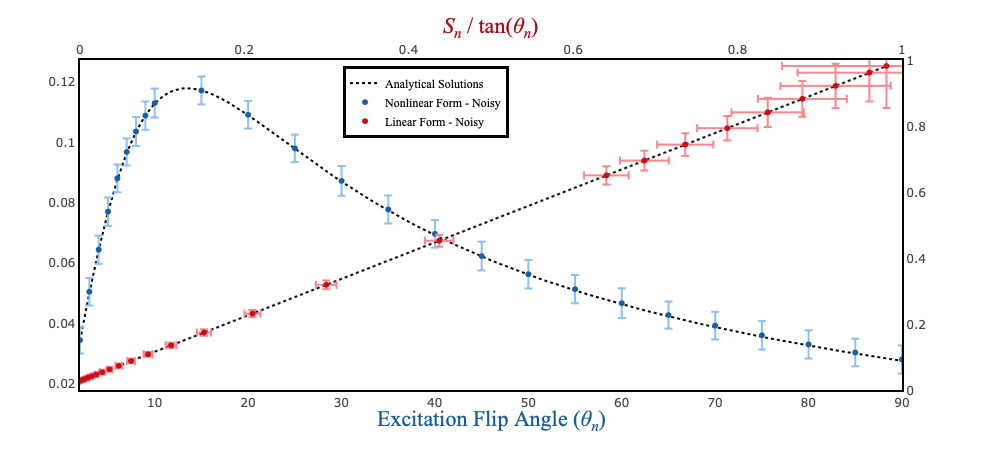

In [15]:
# PYTHON CODE

init_notebook_mode(connected=True)

data1 = dict(
        visible = True,
        x = params_highres["EXC_FA"],
        y = signal_WM,
        name = 'Analytical Solutions',
        text = params["EXC_FA"],
        mode = 'lines', 
        line = dict(
            color = ('rgb(0, 0, 0)'),
            dash = 'dot'),
        hoverinfo='none')

data2 = dict(
        visible = True,
        x = signal_WM_div_tan,
        y = signal_WM_div_sin,
        name = 'Analytical Solutions',
        text = params_highres["EXC_FA"],
        mode = 'lines',
        xaxis='x2',
        yaxis='y2',
        line = dict(
            color = ('rgb(0, 0, 0)'),
            dash = 'dot'
            ),
        hoverinfo='none',
        showlegend=False)

data3 = dict(
        visible = True,
        x = params["EXC_FA"],
        y = data_mean,
        name = 'Nonlinear Form - Noisy',
        text = ["Flip angle: " + str(x) + "°" for x in params["EXC_FA"]],
        mode = 'markers',
        hoverinfo = 'y+text',
        line = dict(
            color = ('rgb(22, 96, 167)'),
            ),
        error_y=dict(
            type='data',
            array=data_std,
            visible=True,
            color = ('rgb(142, 192, 240)')
        ))

data4 = dict(
        visible = True,
        x = data_mean_div_tan,
        y = data_mean_div_sin,
        name = 'Linear Form - Noisy',
        text = ["Flip angle: " + str(x) + "°" for x in params["EXC_FA"]],
        mode = 'markers',
        xaxis='x2',
        yaxis='y2',
        hoverinfo = 'x+y+text',
        line = dict(
            color = ('rgb(205, 12, 24)'),
            ),
        error_x=dict(
            type='data',
            array=data_std_div_tan,
            visible=True,
            color = ('rgb(248, 135, 142)')
        ),
        error_y=dict(
            type='data',
            array=data_std_div_sin,
            visible=True,
            color = ('rgb(248, 135, 142)')
        ))

data = [data1, data2, data3, data4]

layout = go.Layout(
    width=580,
    height=450,
    margin=go.layout.Margin(
        l=80,
        r=80,
        b=60,
        t=60,
    ),
    annotations=[
        dict(
            x=0.5004254919715793,
            y=-0.14,
            showarrow=False,
            text='Excitation Flip Angle (<i>θ<sub>n</sub></i>)',
            font=dict(
                family='Times New Roman',
                size=22,
                color=('rgb(21, 91, 158)')
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.17,
            y=0.5,
            showarrow=False,
            text='Signal (<i>S<sub>n</sub></i>)',
            font=dict(
                family='Times New Roman',
                size=22,
                color=('rgb(21, 91, 158)')
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        ),
        dict(
            x=0.5004254919715793,
            y=1.15,
            showarrow=False,
            text='<i>S<sub>n</sub></i> / tan(<i>θ<sub>n</sub></i>)',
            font=dict(
                family='Times New Roman',
                size=22,
                color=('rgb(169, 10, 20)') 
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=1.16,
            y=0.5,
            showarrow=False,
            text='<i>S<sub>n</sub></i> / sin(<i>θ<sub>n</sub></i>)',
            font=dict(
                family='Times New Roman',
                size=22,
                color=('rgb(169, 10, 20)') 
            ),
            xref='paper',
            yref='paper',
            textangle=-90,
        ),
    ],
    xaxis=dict(
        autorange=False,
        range=[params['EXC_FA'][0], params['EXC_FA'][-1]],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    xaxis2=dict(
        autorange=False,
        range=[0, 1],
        showgrid=False,
        mirror=True,
        overlaying= 'x',
        anchor= 'y2',
        side= 'top',
        linecolor='black',
        linewidth=2
    ),
    yaxis2=dict(
        autorange=False,
        range=[0, 1],
        showgrid=False,
        overlaying= 'y',
        anchor= 'x',
        side= 'right',
        linecolor='black',
        linewidth=2
    ),
    legend=dict(
        x=0.32,
        y=0.98,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    ), 
)

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-line', config = config)

<div class=blog_body>

<p style="text-align:justify;">
There are two important imaging protocol design considerations that should be taken into account when planning to use VFA: (1) how many and which flip angles to use to acquire VFA data, and (2) correcting inaccurate flip angles due to transmit RF field inhomogeneity. Most VFA experiments use the minimum number of required flip angles (two) to minimize acquisition time. For this case, it has been shown that the flip angle choice resulting in the best precision for VFA T<sub>1</sub> estimates for a sample with a single T<sub>1</sub> value (i.e. single tissue) are the two flip angles that result in 71% of the maximum possible steady-state signal (i.e. at the Ernst angle) (Deoni et al. 2003; Schabel & Morrell 2009).
</p>

<p style="text-align:justify;">
Time allowing, additional flip angles are often acquired at higher values and in between the two above, because greater signal differences between tissue T<sub>1</sub> values are present there (e.g. Figure 2). Also, for more than two flip angles, Equations 1 and 4 do not have the same noise weighting for each fitting point, which may bias linear least-square T<sub>1</sub> estimates at lower SNRs. Thus, it has been recommended that low SNR data should be fitted with either Equation 1 using non-linear least-squares (slower fitting) or with a weighted linear least-squares form of Equation 4 (Chang et al. 2008).
</p>

<p style="text-align:justify;">
Accurate knowledge of the flip angle values is very important to produce accurate T<sub>1</sub> maps. Because of how the RF field interacts with matter (Sled & Pike 1998), the excitation RF field (B<sub>1</sub><sup>+</sup>, or B<sub>1</sub> for short) of a loaded RF coil results in spatial variations in intensity/amplitude, unless RF shimming is available to counteract this effect (not common at clinical field strengths). For quantitative measurements like VFA which are sensitive to this parameter, the flip angle can be corrected (voxelwise) relative to the nominal value by multiplying it with a scaling factor (B<sub>1</sub>) from a B<sub>1</sub> map that is acquired during the same session:
</p>

<p style="text-align:justify;">
<center><img src="equation6.png" style="width:auto;height:50px;margin-bottom: 50px;margin-top: 50px"></center>
</p>

<p style="text-align:justify;">
B<sub>1</sub> in this context is normalized, meaning that it is unitless and has a value of 1 in voxels where the RF field has the expected amplitude (i.e. where the nominal flip angle is the actual flip angle). Figure 6 displays fitted VFA T<sub>1</sub> values from a Monte Carlo dataset simulated using biased flip angle values, and fitted without/with B<sub>1</sub> correction.
</p>

</div>

<div class=figure_caption>
<p style="text-align:justify;">
<b>
Figure 6. Mean and standard deviations of fitted VFA T<sub>1</sub> values for a set of Monte Carlo simulations (SNR = 100, N = 1000), simulated using a wide range of biased flip angles and fitted without (blue) or with (red) B<sub>1</sub> correction. Simulation parameters: TR = 25 ms, T<sub>1</sub> = 900 ms, <i>θ<sub>nominal</sub></i> = 6° and 32° (optimized values for this TR/T<sub>1</sub> combination). Notice how even after B<sub>1</sub> correction, fitted T<sub>1</sub> values at B<sub>1</sub> values far from the nominal case (B<sub>1</sub> = 1) exhibit larger variance, as the actual flip angles of the simulated signal deviate from the optimal values for this TR/T<sub>1</sub> (Deoni et al. 2003).
</b>
</div>

In [16]:
%% MATLAB/OCTAVE CODE
% Code used to generate the data required for Figure 4 of the blog post

clear all

%% Setup parameters
% All times are in seconds
% All flip angles are in degrees

params.TR = 0.025; % in seconds

% White matter
params.T1 = 0.900; % in seconds

% Calculate optimal flip angles for a two flip angle VFA experiment (for this T1 and TR)
% The will be the nominal flip angles (the flip angles assumed by the "user", before a 
% "realistic"B1 bias is applied)

nominal_EXC_FA = vfa_t1.find_two_optimal_flip_angles(params); % in degrees
disp('Nominal flip angles:')
disp(nominal_EXC_FA)

% Range of B1 values biasing the excitation flip angle away from their nominal values
B1Range = 0.1:0.1:2;

x.M0 = 1;
x.T1 = params.T1; % in seconds

Model = vfa_t1; 

Opt.SNR = 100;
Opt.TR = params.TR;
Opt.T1 = x.T1;

% Monte Carlo signal simulations
for ii = 1:1000
    for jj = 1:length(B1Range)
        B1 = B1Range(jj);
        actual_EXC_FA = B1 * nominal_EXC_FA;
 
        params.EXC_FA = actual_EXC_FA;

        clear Model.Prot.VFAData.Mat(:,1)
        Model.Prot.VFAData.Mat = zeros(length(params.EXC_FA),2);
        Model.Prot.VFAData.Mat(:,1) = params.EXC_FA';
        Model.Prot.VFAData.Mat(:,2) = Opt.TR;

        [FitResult{ii,jj}, noisyData{ii,jj}] = Model.Sim_Single_Voxel_Curve(x,Opt,0); 
        noisyData_array(ii,jj,:) = noisyData{ii,jj}.VFAData;
    end
end
%
Model = vfa_t1; 
    
FlipAngle = nominal_EXC_FA';
TR = params.TR .* ones(size(FlipAngle));

Model.Prot.VFAData.Mat = [FlipAngle TR];

data.VFAData(:,:,1,1) = noisyData_array(:,:,1);
data.VFAData(:,:,1,2) = noisyData_array(:,:,2);
data.Mask = repmat(ones(size(B1Range)),[size(noisyData_array,1),1]);

data.B1map = repmat(ones(size(B1Range)),[size(noisyData_array,1),1]);
FitResults_noB1Correction = FitData(data,Model,0);

data.B1map = repmat(B1Range,[size(noisyData_array,1),1]);
FitResults_withB1Correction = FitData(data,Model,0);

%%
%

mean_T1_noB1Correction = mean(FitResults_noB1Correction.T1);
mean_T1_withB1Correction = mean(FitResults_withB1Correction.T1);
std_T1_noB1Correction = std(FitResults_noB1Correction.T1);
std_T1_withB1Correction = std(FitResults_withB1Correction.T1);


Nominal flip angles:
    6   32
Fitting voxel      0/20000
Fitting voxel      0/20000


In [17]:
%get B1Range --from Octave
%get mean_T1_noB1Correction --from Octave
%get mean_T1_withB1Correction --from Octave
%get std_T1_noB1Correction --from Octave
%get std_T1_withB1Correction --from Octave


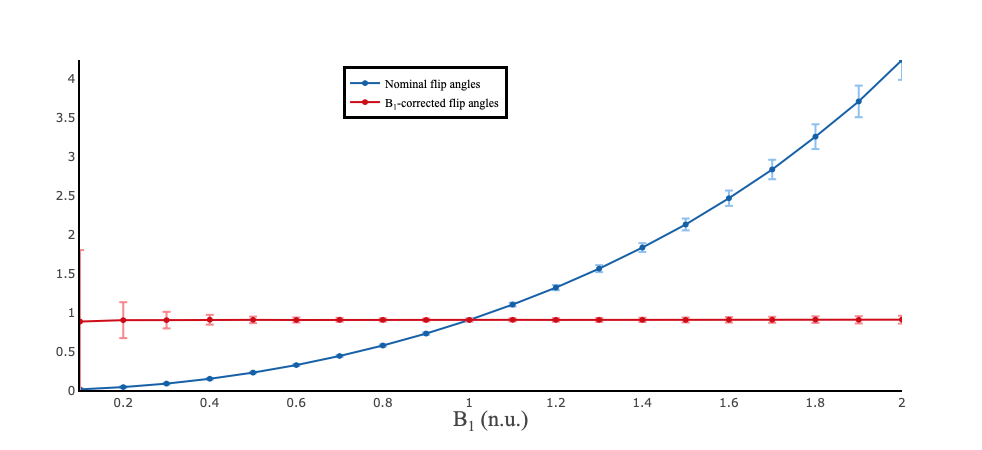

In [18]:
# PYTHON CODE

init_notebook_mode(connected=True)

data1 = dict(
        visible = True,
        x = B1Range,
        y = mean_T1_noB1Correction,
        name = 'Nominal flip angles',
        text = 'Nominal flip angles',
        mode = 'lines+markers',
        hoverinfo = 'x+y+text',
        line = dict(
            color = ('rgb(22, 96, 167)'),
            ),
        error_y=dict(
            type='data',
            array=std_T1_noB1Correction,
            visible=True,
            color = ('rgb(142, 192, 240)')
        ))

data2 = dict(
        visible = True,
        x = B1Range,
        y = mean_T1_withB1Correction,
        name = 'B<sub>1</sub>-corrected flip angles',
        text = 'B<sub>1</sub>-corrected flip angles',
        mode = 'lines+markers',
        hoverinfo = 'x+y+text',
        line = dict(
            color = ('rgb(205, 12, 24)'),
            ),
        error_y=dict(
            type='data',
            array=std_T1_withB1Correction,
            visible=True,
            color = ('rgb(248, 135, 142)')
        ))

data = [data1, data2]

layout = go.Layout(
    width=580,
    height=450,
    margin=go.layout.Margin(
        l=80,
        r=80,
        b=60,
        t=60,
    ),
    annotations=[
        dict(
            x=0.5004254919715793,
            y=-0.14,
            showarrow=False,
            text='B<sub>1</sub> (n.u.)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.17,
            y=0.5,
            showarrow=False,
            text='T<sub>1</sub> (s)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        ),
    ],
    xaxis=dict(
        autorange=False,
        range=[B1Range[0], B1Range[-1]],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        autorange=False,
        range=[0, max(mean_T1_noB1Correction)],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    legend=dict(
        x=0.32,
        y=0.98,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    ), 
)

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-line', config = config)

<div class=blog_body>
<p style="text-align:justify;">
Figure 7 displays an example VFA dataset and a B<sub>1</sub> map in a healthy brain, along with the T<sub>1</sub> map estimated using a linear fit (Equations 4 and 5).
</p>
</div>

<div class=figure_caption>
<p style="text-align:justify;">
<b>
Figure 7. Example variable flip angle dataset and B<sub>1</sub> map of a healthy adult brain (left). The relevant VFA protocol parameters used were: TR = 15 ms, <i>θ<sub>nominal</sub></i> = 3° and 20°. The T<sub>1</sub> map (right) was fitted using a linear regression (Equations 4 and 5).
</b>
</div>

In [19]:
%% MATLAB/OCTAVE CODE
% Download variable flip angle brain MRI data for Figure 7 of the blog post

cmd = ['curl -L -o vfa_brain.zip https://osf.io/wj6eg/download/'];
[STATUS,MESSAGE] = unix(cmd);
unzip('vfa_brain.zip');


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0   1390      0 --:--:-- --:--:-- --:--:--  1390
100 64384  100 64384    0     0  57588      0  0:00:01  0:00:01 --:--:--  682k


In [20]:
%% MATLAB/OCTAVE CODE
% Code used to generate the data required for Figure 5 of the blog post

clear all

% Load data into environment, and rotate mask to be aligned with IR data
load('VFAData.mat');
load('B1map.mat');
load('Mask.mat');

% Format qMRLab vfa_t1 model parameters, and load them into the Model object
Model = vfa_t1; 
FlipAngle = [    3;     20];
TR        = [0.015; 0.0150];


Model.Prot.VFAData.Mat = [FlipAngle, TR];

% Format data structure so that they may be fit by the model
data = struct();
data.VFAData= double(VFAData);
data.B1map= double(B1map);
data.Mask= double(Mask);

FitResults = FitData(data,Model,0); % The '0' flag is so that no wait bar is shown.

Fitting voxel     0/4321


In [21]:
%% MATLAB/OCTAVE CODE
% Code used to re-orient the images to make pretty figures, and to assign variables with the axis lengths.

T1_map = imrotate(FitResults.T1.*Mask,-90);
T1_map(T1_map>5)=0;
T1_map = T1_map*1000; % Convert to ms

xAxis = [0:size(T1_map,2)-1];
yAxis = [0:size(T1_map,1)-1];

% Raw MRI data at different TI values
FA_03 = imrotate(squeeze(VFAData(:,:,:,1).*Mask),-90);
FA_20 = imrotate(squeeze(VFAData(:,:,:,2).*Mask),-90);
B1map = imrotate(squeeze(B1map.*Mask),-90);



In [22]:
%get T1_map --from Octave
%get FA_03 --from Octave
%get FA_20 --from Octave
%get B1map --from Octave
%get xAxis --from Octave
%get yAxis --from Octave

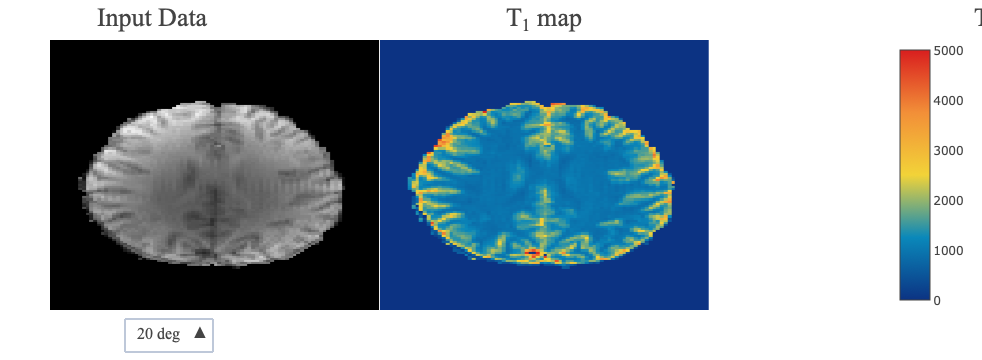

In [23]:
from plotly import tools

trace1 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=FA_03,
                   colorscale='Greys',
                   showscale = False,
                   visible=False,
                   name = 'Signal')
trace2 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=FA_20,
                   colorscale='Greys',
                   showscale = False,
                   visible=True,
                   name = 'Signal')
trace3 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=B1map,
                   zmin=0.7,
                   zmax=1.3,
                   colorscale='RdBu',
                   showscale = False,
                   visible=False,
                   name = 'B1 values')
trace5 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=T1_map,
                   zmin=0.0,
                   zmax=5000,
                   colorscale='Portland',
                   xaxis='x2',
                   yaxis='y2',
                   visible=True,
                   name = 'T1 values (ms)')

data=[trace1, trace2, trace3, trace5]


updatemenus = list([
    dict(active=1,
         x = 0.09,
         xanchor = 'left',
         y = -0.15,
         yanchor = 'bottom',
         direction = 'up',
         font=dict(
                family='Times New Roman',
                size=16
            ),
         buttons=list([   
            dict(label = '3 deg',
                 method = 'update',
                 args = [{'visible': [True, False, False, True]},
                         ]),
            dict(label = '20 deg',
                 method = 'update',
                 args = [{'visible': [False, True, False, True]},
                           ]),
            dict(label = 'B<sub>1</sub> map',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                           ])
        ])
    )
])

layout = dict(
    width=560,
    height=345,
    margin = dict(
                t=40,
                r=50,
                b=10,
                l=50),
    annotations=[
        dict(
            x=0.055,
            y=1.15,
            showarrow=False,
            text='Input Data',
            font=dict(
                family='Times New Roman',
                size=26
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=0.6,
            y=1.15,
            showarrow=False,
            text='T<sub>1</sub> map',
            font=dict(
                family='Times New Roman',
                size=26
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=1.22,
            y=1.15,
            showarrow=False,
            text='T<sub>1</sub> (ms)',
            font=dict(
                family='Times New Roman',
                size=26
            ),
            xref='paper',
            yref='paper'
        ),
    ],
    xaxis = dict(range = [0,127], autorange = False,
             showgrid = False, zeroline = False, showticklabels = False,
             ticks = '', domain=[0, 0.58]),
    yaxis = dict(range = [0,127], autorange = False,
             showgrid = False, zeroline = False, showticklabels = False,
             ticks = '', domain=[0, 1]),
    xaxis2 = dict(range = [0,127], autorange = False,
             showgrid = False, zeroline = False, showticklabels = False,
             ticks = '', domain=[0.40, 0.98]),
    yaxis2 = dict(range = [0,127], autorange = False,
             showgrid = False, zeroline = False, showticklabels = False,
             ticks = '', domain=[0, 1], anchor='x2'),
    showlegend = False,
    autosize = False,
    updatemenus=updatemenus
)


fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-heatmap', config = config)

<center> <h2 style="font-family:timesnewroman;font-size:30px">Benefits and Pitfalls</h2> </center>

<div class=blog_body>
<p style="text-align:justify;">
It has been well reported in recent years that the accuracy of VFA T<sub>1</sub> estimates is very sensitive to pulse sequence implementations (Stikov et al. 2015; Lutti & Weiskopf 2013; Baudrexel et al. 2018), and as such is less robust than the gold standard inversion recovery technique. In particular, the signal bias resulting from insufficient spoiling can result in inaccurate T<sub>1</sub> estimates of up to 30% relative to inversion recovery estimated values (Stikov et al. 2015). VFA T<sub>1</sub> map accuracy and precision is also strongly dependent on the quality of the measured B<sub>1</sub> map (Lee et al. 2017), which can vary substantially between implementations (Boudreau et al. 2017). Modern rapid B<sub>1</sub> mapping pulse sequences are not as widely available as VFA, resulting in some groups attempting alternative ways of removing the bias from the T<sub>1</sub> maps like generating an artificial B<sub>1</sub> map through the use of image processing techniques (Liberman et al. 2014) or omitting B<sub>1</sub> correction altogether (Yuan et al. 2012). The latter is not recommended, because most MRI scanners have default pulse sequences that, with careful protocol settings, can provide B<sub>1</sub> maps of sufficient quality very rapidly (Boudreau et al. 2017; Wang et al. 2005; Samson et al. 2006).
</p>

<p style="text-align:justify;">
Despite some drawbacks, VFA is still one of the most widely used T<sub>1</sub> mapping methods in research. Its rapid acquisition time, rapid image processing time, and widespread availability makes it a great candidate for use in other quantitative imaging acquisition protocols like quantitative magnetization transfer imaging (Yarnykh 2002; Cercignani et al. 2005) and dynamic contrast enhanced imaging (Sung et al. 2013; Li et al. 2018).
</p>
</div>

<center> <h2 style="font-family:timesnewroman;font-size:30px">Works Cited</h2> </center>

<div class=biblio_body>
<p style="text-align:justify;">
Baudrexel, S. et al., 2018. T<sub>1</sub> mapping with the variable flip angle technique: A simple correction for insufficient spoiling of transverse magnetization. <i>Magn. Reson. Med.</i>, 79(6), pp.3082–3092.
</p>

<p style="text-align:justify;">
Bernstein, M., King, K. & Zhou, X., 2004. <i>Handbook of MRI Pulse Sequences</i>, Elsevier.
</p>

<p style="text-align:justify;">
    Boudreau, M. et al., 2017. B<sub>1</sub> mapping for bias-correction in quantitative T<sub>1</sub> imaging of the brain at 3T using standard pulse sequences. <i>J. Magn. Reson. Imaging</i>, 46(6), pp.1673–1682.
</p>

<p style="text-align:justify;">
Cercignani, M. et al., 2005. Three-dimensional quantitative magnetisation transfer imaging of the human brain. <i>Neuroimage</i>, 27(2), pp.436–441.
</p>

<p style="text-align:justify;">
    Chang, L.-C. et al., 2008. Linear least-squares method for unbiased estimation of T<sub>1</sub> from SPGR signals. <i>Magn. Reson. Med.</i>, 60(2), pp.496–501.
</p>

<p style="text-align:justify;">
Christensen, K.A. et al., 1974. Optimal determination of relaxation times of fourier transform nuclear magnetic resonance. Determination of spin-lattice relaxation times in chemically polarized species. <i>J. Phys. Chem.</i>, 78(19), pp.1971–1977.
</p>

<p style="text-align:justify;">
Deoni, S.C.L., Rutt, B.K. & Peters, T.M., 2003. Rapid combined T<sub>1</sub> and T<sub>2</sub> mapping using gradient recalled acquisition in the steady state. <i>Magn. Reson. Med.</i>, 49(3), pp.515–526.
</p>

<p style="text-align:justify;">
Ernst, R.R. & Anderson, W.A., 1966. Application of Fourier Transform Spectroscopy to Magnetic Resonance. <i>Rev. Sci. Instrum.</i>, 37(1), pp.93–102.
</p>

<p style="text-align:justify;">
Fram, E.K. et al., 1987. Rapid calculation of T<sub>1</sub> using variable flip angle gradient refocused imaging. <i>Magn. Reson. Imaging</i>, 5(3), pp.201–208.
</p>

<p style="text-align:justify;">
Gupta, R.K., 1977. A new look at the method of variable nutation angle for the measurement of spin-lattice relaxation times using fourier transform NMR. <i>J. Magn. Reson.</i>, 25(1), pp.231–235.
</p>

<p style="text-align:justify;">
Homer, J. & Beevers, M.S., 1985. Driven-equilibrium single-pulse observation of T<sub>1</sub> relaxation. A reevaluation of a rapid “new” method for determining NMR spin-lattice relaxation times. <i>J. Magn. Reson.</i>, 63(2), pp.287–297.
</p>

<p style="text-align:justify;">
Lee, Y., Callaghan, M.F. & Nagy, Z., 2017. Analysis of the Precision of Variable Flip Angle T<sub>1</sub> Mapping with Emphasis on the Noise Propagated from RF Transmit Field Maps. <i>Front. Neurosci.</i>, 11, p.106.
</p>

<p style="text-align:justify;">
Liberman, G., Louzoun, Y. & Ben Bashat, D., 2014. T<sub>1</sub> mapping using variable flip angle SPGR data with flip angle correction. <i>J. Magn. Reson. Imaging</i>, 40(1), pp.171–180.
</p>

<p style="text-align:justify;">
Li, Z.F. et al., 2018. A simple B<sub>1</sub> correction method for dynamic contrast-enhanced MRI. <i>Phys. Med. Biol.</i>, 63(16), p.16NT01.
</p>

<p style="text-align:justify;">
Lutti, A. & Weiskopf, N., 2013. Optimizing the accuracy of T<sub>1</sub> mapping accounting for RF non-linearities and spoiling characteristics in FLASH imaging. In <i>Proceedings of the 21st Annual Meeting of ISMRM, Salt Lake City, Utah, USA.</i> p. 2478.
</p>

<p style="text-align:justify;">
Samson, R.S. et al., 2006. A simple correction for B<sub>1</sub> field errors in magnetization transfer ratio measurements. <i>Magn. Reson. Imaging</i>, 24(3), pp.255–263.
</p>

<p style="text-align:justify;">
Schabel, M.C. & Morrell, G.R., 2009. Uncertainty in T<sub>1</sub> mapping using the variable flip angle method with two flip angles. <i>Phys. Med. Biol.</i>, 54(1), pp.N1–8.
</p>

<p style="text-align:justify;">
Sled, J.G. & Pike, G.B., 1998. Standing-wave and RF penetration artifacts caused by elliptic geometry: an electrodynamic analysis of MRI. <i>IEEE Trans. Med. Imaging</i>, 17(4), pp.653–662.
</p>

<p style="text-align:justify;">
Stikov, N. et al., 2015. On the accuracy of T<sub>1</sub> mapping: Searching for common ground. <i>Magn. Reson. Med.</i>, 73(2), pp.514–522.
</p>

<p style="text-align:justify;">
Sung, K., Daniel, B.L. & Hargreaves, B.A., 2013. Transmit B<sub>1</sub><sup>+</sup> field inhomogeneity and T<sub>1</sub> estimation errors in breast DCE-MRI at 3 tesla. <i>J. Magn. Reson. Imaging</i>, 38(2), pp.454–459.
</p>

<p style="text-align:justify;">
Wang, J., Qiu, M. & Constable, R.T., 2005. In vivo method for correcting transmit/receive nonuniformities with phased array coils. <i>Magn. Reson. Med.</i>, 53(3), pp.666–674.
</p>

<p style="text-align:justify;">
Yarnykh, V.L., 2010. Optimal radiofrequency and gradient spoiling for improved accuracy of T<sub>1</sub> and B<sub>1</sub> measurements using fast steady-state techniques. <i>Magn. Reson. Med.</i>, 63(6), pp.1610–1626.
</p>

<p style="text-align:justify;">
Yarnykh, V.L., 2002. Pulsed Z-spectroscopic imaging of cross-relaxation parameters in tissues for human MRI: theory and clinical applications. <i>Magn. Reson. Med.</i>, 47(5), pp.929–939.
</p>

<p style="text-align:justify;">
Yuan, J. et al., 2012. Quantitative evaluation of dual-flip-angle T<sub>1</sub> mapping on DCE-MRI kinetic parameter estimation in head and neck. <i>Quant. Imaging Med. Surg.</i>, 2(4), pp.245–253.
</p>

<p style="text-align:justify;">
Zur, Y., Wood, M.L. & Neuringer, L.J., 1991. Spoiling of transverse magnetization in steady-state sequences. <i>Magn. Reson. Med.</i>, 21(2), pp.251–263.
</p>

</div>

In [24]:
# PYTHON CODE

display(HTML(
    '<style type="text/css">'
    '.output_subarea {'
        'display: block;'
        'margin-left: auto;'
        'margin-right: auto;'
    '}'
    '.blog_body {'
        'line-height: 2;'
        'font-family: timesnewroman;'
        'font-size: 18px;'
        'margin-left: 0px;'
        'margin-right: 0px;'
    '}'
    '.biblio_body {'
        'line-height: 1.5;'
        'font-family: timesnewroman;'
        'font-size: 18px;'
        'margin-left: 0px;'
        'margin-right: 0px;'
    '}'
    '.note_body {'
        'line-height: 1.25;'
        'font-family: timesnewroman;'
        'font-size: 18px;'
        'margin-left: 0px;'
        'margin-right: 0px;'
        'color: #696969'
    '}'
    '.figure_caption {'
        'line-height: 1.5;'
        'font-family: timesnewroman;'
        'font-size: 16px;'
        'margin-left: 0px;'
        'margin-right: 0px'
    '</style>'
))